<a href="https://colab.research.google.com/github/GustavoEmanuel901/Analise-dados-de-saude-mental-curitiba/blob/main/Analise_dos_dados_Curitiba_Sa%C3%BAde_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=8
data = pd.read_csv('2024-10-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='latin-1')

data.head()

<ipython-input-4-b0ec242bc425>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2024-10-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='latin-1')


,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/05/2024 01:06:58,14/12/1978 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NaN,NaN,NaN,TUNAS DO PARANA,BAIRRO NAO INFORMADO,Brasileira,8915683,2,2,15641
1,01/05/2024 02:07:14,12/05/2012 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NaN,NaN,NaN,CURITIBA,TATUQUARA,Brasileira,12061371,1,1,97106
2,01/05/2024 00:35:51,23/06/2015 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,OUTROS,OUTROS,OUTROS,CURITIBA,CENTRO,Brasileira,10096914,1,1,15641
3,01/05/2024 01:21:32,09/05/1998 00:00:00,F,2,UPA,9214097,UPA TATUQUARA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,TATUQUARA,Brasileira,11538719,1,1,119831
4,01/05/2024 00:18:56,08/01/2004 00:00:00,M,2,UPA,2639556,UPA SITIO CERCADO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira,4368343,1,1,119721


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200779 entries, 0 to 1200778
Data columns (total 42 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Data do Atendimento                           1200779 non-null  object 
 1   Data de Nascimento                            1200779 non-null  object 
 2   Sexo                                          1200779 non-null  object 
 3   Código do Tipo de Unidade                     1200779 non-null  int64  
 4   Tipo de Unidade                               1200779 non-null  object 
 5   Código da Unidade                             1200779 non-null  int64  
 6   Descrição da Unidade                          1200779 non-null  object 
 7   Código do Procedimento                        1200779 non-null  int64  
 8   Descrição do Procedimento                     1200779 non-null  object 
 9   Código do CBO                      

# Filtrando Dados para transtornos mentais

In [ ]:
filtro_codigo_do_transtornos_mentais = data[data['Código do CID'].str.contains('F', na=False)]

filtro_codigo_do_transtornos_mentais.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
35,01/05/2024 00:31:03,13/11/1961 00:00:00,F,2,UPA,2438917,UPA BOQUEIRAO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,GANCHINHO,Brasileira,1245124,1,1,123518
102,01/05/2024 01:50:35,13/12/1980 00:00:00,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SANTO INACIO,Brasileira,8732671,1,1,48392
107,01/05/2024 01:55:50,17/10/1989 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NaN,NaN,NaN,CURITIBA,CAMPO DE SANTANA,Brasileira,12012795,1,1,119831
122,01/05/2024 02:29:48,10/04/1998 00:00:00,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAJURU,Brasileira,2400783,1,1,123492
129,01/05/2024 02:54:36,21/03/1992 00:00:00,F,2,UPA,2639467,UPA FAZENDINHA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,104898,1,1,117965


# Análise Quantitavia

In [ ]:
doencas = filtro_codigo_do_transtornos_mentais['Descrição do CID'].unique()

doencas

array(['TRANSTORNO PSICOTICO AGUDO E TRANSITORIO NAO ESPECIFICADO',
       'ANSIEDADE GENERALIZADA',
       'TRANSTORNOS MENTAIS E COMPORT. DEVIDOS USO DE ALCOOL - INTOXICACAO AGUDA',
       'TRANSTORNO ANSIOSO NAO ESPECIFICADO',
       'TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAINA - OUTROS TRANSTORNOS MENTAIS OU COMPORTAMENTAIS',
       'TRANSTORNO NAO ESPECIFICADO DO DESENVOLVIMENTO DAS HABILIDADES ESCOLARES',
       'AUTISMO INFANTIL', 'EPISODIO DEPRESSIVO MODERADO',
       'SINTOMAS FISICOS AUMENTADOS POR FATORES PSICOLOGICOS',
       'DEMENCIA NAO ESPECIFICADA',
       'TRANSTORNOS MENTAIS E COMPORT. DEVIDOS USO DE ALCOOL - TRANSTORNO MENTAL OU COMPORT. NAO ESPECIFICADO',
       'TRANSTORNO MENTAL NAO ESPECIFICADO EM OUTRA PARTE',
       'TRANSTORNO DE PANICO [ANSIEDADE PAROXISTICA EPISODICA]',
       'TRANSTORNO AFETIVO BIPOLAR, ATUALMENTE EM REMISSAO',
       'RETARDO MENTAL NAO ESPECIFICADO - OUTROS COMPROMETIMENTOS DO COMPORTAMENTO',
       'INSONIA NAO-ORGANICA',
       'T

In [ ]:
# Quantidades de doenças
doencas.size

359

In [ ]:
#Quantidade de ocorrencias

doencas = filtro_codigo_do_transtornos_mentais

doencas.size

2383038

In [ ]:
contagem = filtro_codigo_do_transtornos_mentais['Descrição do CID'].value_counts()

# Ordenar os resultados
contagem_ordenada = contagem.sort_values(ascending=False)

contagem_ordenada.head()

,count
Descrição do CID,
ANSIEDADE GENERALIZADA,16066
TRANSTORNO ANSIOSO NAO ESPECIFICADO,4401
AUTISMO INFANTIL,3187
DISTURBIOS DA ATIVIDADE E DA ATENCAO,2168
TRANSTORNO MISTO ANSIOSO E DEPRESSIVO,1905


In [ ]:
contagem_ordenada.to_csv('contagem_numero_de_ocorrencias_de_cada_transtorno.csv', sep=';')

In [ ]:
filtro_ANSI = filtro_codigo_do_transtornos_mentais[filtro_codigo_do_transtornos_mentais['Descrição do CID'].str.contains('ANSI', na=False)]

filtro_ANSI['Descrição do CID'].unique()

array(['TRANSTORNO PSICOTICO AGUDO E TRANSITORIO NAO ESPECIFICADO',
       'ANSIEDADE GENERALIZADA', 'TRANSTORNO ANSIOSO NAO ESPECIFICADO',
       'TRANSTORNO DE PANICO [ANSIEDADE PAROXISTICA EPISODICA]',
       'TRANSTORNO MISTO ANSIOSO E DEPRESSIVO',
       'TRANSTORNOS DA ANSIEDADE ORGANICOS',
       'TRANSTORNO FOBICO-ANSIOSO NAO ESPECIFICADO',
       'OUTROS TRANSTORNOS ANSIOSOS ESPECIFICADOS',
       'OUTROS TRANSTORNOS ANSIOSOS MISTOS',
       'OUTROS TRANSTORNOS PSICOTICOS AGUDOS E TRANSITORIOS',
       'DISTURBIO DE ANSIEDADE SOCIAL DA INFANCIA',
       'OUTROS TRANSTORNOS FOBICO-ANSIOSOS',
       'PERSONALIDADE ANSIOSA [ESQUIVA]', 'TIQUE TRANSITORIO',
       'TRANSTORNO FOBICO ANSIOSO DA INFANCIA', 'OUTR TRANST ANSIOSOS',
       'TRANST PSICOTICOS AGUDOS E TRANSITORIOS'], dtype=object)

In [ ]:
quantidade_de_casos_com_transtorno_ansioso = filtro_ANSI['Descrição do CID'].value_counts().sum()

quantidade_de_casos_com_transtorno_ansioso

24783

In [ ]:
filtro_DEPRE = filtro_codigo_do_transtornos_mentais[filtro_codigo_do_transtornos_mentais['Descrição do CID'].str.contains('DEPRE', na=False)]

filtro_DEPRE['Descrição do CID'].unique()

array(['EPISODIO DEPRESSIVO MODERADO',
       'TRANSTORNO DEPRESSIVO RECORRENTE SEM ESPECIFICACAO',
       'EPISODIO DEPRESSIVO LEVE', 'EPISODIO DEPRESSIVO NAO ESPECIFICADO',
       'TRANSTORNO DEPRESSIVO RECORRENTE, EPISODIO ATUAL GRAVE SEM SINTOMAS PSICOTICOS',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL DEPRESSIVO GRAVE COM SINTOMAS PSICOTICOS',
       'TRANSTORNO MISTO ANSIOSO E DEPRESSIVO',
       'EPISODIO DEPRESSIVO GRAVE SEM SINTOMAS PSICOTICOS',
       'EPISODIO DEPRESSIVO GRAVE COM SINTOMAS PSICOTICOS',
       'TRANSTORNO ESQUIZOAFETIVO DO TIPO DEPRESSIVO',
       'TRANSTORNO DEPRESSIVO RECORRENTE, EPISODIO ATUAL MODERADO',
       'TRANSTORNO DEPRESSIVO RECORRENTE, EPISODIO ATUAL LEVE',
       'OUTROS EPISODIOS DEPRESSIVOS',
       'OUTROS TRANSTORNOS DEPRESSIVOS RECORRENTES',
       'TRANSTORNO DEPRESSIVO RECORRENTE, EPISODIO ATUAL GRAVE COM SINTOMAS PSICOTICOS',
       'DISTURBIO DEPRESSIVO DE CONDUTA',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL DEPRESSIVO LE

In [ ]:
quantidade_de_casos_com_transtorno_depressivo = filtro_DEPRE['Descrição do CID'].value_counts().sum()

quantidade_de_casos_com_transtorno_depressivo

8975

In [ ]:
filtro_BIPOLAR = filtro_codigo_do_transtornos_mentais[filtro_codigo_do_transtornos_mentais['Descrição do CID'].str.contains('BIPOLAR', na=False)]

filtro_BIPOLAR['Descrição do CID'].unique()

array(['TRANSTORNO AFETIVO BIPOLAR, ATUALMENTE EM REMISSAO',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL MISTO',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL DEPRESSIVO GRAVE COM SINTOMAS PSICOTICOS',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL MANIACO SEM SINTOMAS PSICOTICOS',
       'TRANSTORNO AFETIVO BIPOLAR NAO ESPECIFICADO',
       'OUTROS TRANSTORNOS AFETIVOS BIPOLARES',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL DEPRESSIVO LEVE OU MODERADO',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL MANIACO COM SINTOMAS PSICOTICOS',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL HIPOMANIACO',
       'TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL DEPRESSIVO GRAVE SEM SINTOMAS PSICOTICOS',
       'TRANST AFETIVO BIPOLAR'], dtype=object)

In [ ]:
quantidade_de_casos_com_transtorno_bipolar = filtro_BIPOLAR['Descrição do CID'].value_counts().sum()

quantidade_de_casos_com_transtorno_bipolar

2950

In [ ]:
filtro_ESQUIZO = filtro_codigo_do_transtornos_mentais[filtro_codigo_do_transtornos_mentais['Descrição do CID'].str.contains('ESQUIZO', na=False)]

filtro_ESQUIZO['Descrição do CID'].unique()

array(['ESQUIZOFRENIA NAO ESPECIFICADA', 'ESQUIZOFRENIA PARANOIDE',
       'TRANSTORNO ESQUIZOAFETIVO DO TIPO MANIACO',
       'TRANSTORNO ESQUIZOAFETIVO DO TIPO DEPRESSIVO',
       'ESQUIZOFRENIA CATATONICA', 'OUTRAS ESQUIZOFRENIAS',
       'ESQUIZOFRENIA HEBEFRENICA', 'OUTROS TRANSTORNOS ESQUIZOAFETIVOS',
       'TRANSTORNO ESQUIZOAFETIVO DO TIPO MISTO',
       'TRANSTORNO ESQUIZOAFETIVO NAO ESPECIFICADO',
       'ESQUIZOFRENIA INDIFERENCIADA', 'ESQUIZOFRENIA RESIDUAL',
       'TRANSTORNO PSICOTICO AGUDO POLIMORFO, COM SINTOMAS ESQUIZOFRENICOS',
       'DEPRESSAO POS-ESQUIZOFRENICA',
       'TRANSTORNO PSICOTICO AGUDO DE TIPO ESQUIZOFRENICO (SCHIZOPHRENIA-LIKE)',
       'ESQUIZOFRENIA SIMPLES',
       'TRANSTORNO PSICOTICO AGUDO POLIMORFO, SEM SINTOMAS ESQUIZOFRENICOS',
       'PERSONALIDADE ESQUIZOIDE', 'TRANSTORNO ESQUIZOTIPICO',
       'TRANSTORNO DELIRANTE ORGANICO [TIPO ESQUIZOFRENICO]',
       'ESQUIZOFRENIA'], dtype=object)

In [ ]:
quantidade_de_casos_com_transtorno_esquizo = filtro_ESQUIZO['Descrição do CID'].value_counts().sum()

quantidade_de_casos_com_transtorno_esquizo

2394

# Agrupamento por cod_usuario
## Para criar histórico de cada paciente

In [ ]:
grupo = filtro_codigo_do_transtornos_mentais.groupby(['cod_usuario'])

grupo.groups

{93: [77341], 219: [474112], 253: [230281, 236566, 965385], 441: [737182], 494: [280257, 1056104], 572: [274522, 274523], 685: [884602], 690: [660814], 720: [682940], 746: [699789], 855: [91062], 1401: [228959, 816418], 1407: [69253, 69254, 69255, 613016, 802990, 948067, 1159788], 1417: [730398], 1476: [1031928], 1605: [829081], 1618: [442380], 1624: [445550], 1641: [506173], 1656: [880924], 1666: [182416, 650501, 650502, 966194], 1674: [550830], 1677: [340173], 1688: [187822, 1094086], 1701: [834382, 919395], 1779: [72345], 1847: [712133], 1915: [423066, 812418], 2103: [480031], 2104: [606851, 741411], 2254: [1014917], 2316: [605834], 2456: [726804], 3285: [944788], 3286: [22994], 3293: [1025224], 3326: [350635, 1172602], 3343: [165732, 460166], 3551: [469090, 469091], 3609: [398843, 881015], 3683: [979933], 6490: [101911, 101912], 7111: [1167621], 7311: [555867], 7312: [415612, 499326, 629578, 637261, 900076], 7499: [404631], 7521: [235787, 907460], 7590: [256662], 7776: [41310, 9446

In [ ]:
grupo.indices

{93: array([3546]),
 219: array([21519]),
 253: array([10311, 10600, 45388]),
 441: array([34237]),
 494: array([12621, 49782]),
 572: array([12353, 12354]),
 685: array([41512]),
 690: array([30544]),
 720: array([31554]),
 746: array([32327]),
 855: array([4125]),
 1401: array([10232, 38286]),
 1407: array([ 3176,  3177,  3178, 28127, 37678, 44517, 54719]),
 1417: array([33895]),
 1476: array([48626]),
 1605: array([38867]),
 1618: array([19998]),
 1624: array([20167]),
 1641: array([23092]),
 1656: array([41347]),
 1666: array([ 8217, 30048, 30049, 45432]),
 1674: array([25261]),
 1677: array([15303]),
 1688: array([ 8438, 51650]),
 1701: array([39107, 43147]),
 1779: array([3323]),
 1847: array([32933]),
 1915: array([19083, 38107]),
 2103: array([21808]),
 2104: array([27872, 34435]),
 2254: array([47770]),
 2316: array([27824]),
 2456: array([33716]),
 3285: array([44376]),
 3286: array([1027]),
 3293: array([48290]),
 3326: array([15834, 55331]),
 3343: array([ 7514, 20889]),
 3

In [ ]:
grupo.get_group(162866)['Descrição do CID']

<ipython-input-68-3c102ab380bf>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grupo.get_group(162866)['Descrição do CID']


,Descrição do CID
208004,ANSIEDADE GENERALIZADA
346815,ANSIEDADE GENERALIZADA
398786,TRANSTORNO ANSIOSO NAO ESPECIFICADO
398787,TRANSTORNO ANSIOSO NAO ESPECIFICADO
423657,TRANSTORNO FOBICO-ANSIOSO NAO ESPECIFICADO
564390,ANSIEDADE GENERALIZADA
649590,TRANSTORNOS MENTAIS E COMPORT. DEV. USO SEDAT....
871433,EPISODIO DEPRESSIVO MODERADO
936736,ANSIEDADE GENERALIZADA
936737,TRANSTORNO ANSIOSO NAO ESPECIFICADO


In [ ]:
grouped = filtro_codigo_do_transtornos_mentais.groupby('cod_usuario').apply(lambda x: x.to_dict(orient='records')).reset_index(name='registros')

# Exibir o dataframe resultante
print(grouped)

       cod_usuario                                          registros
0               93  [{'Data do Atendimento': '11/05/2024 19:37:38'...
1              219  [{'Data do Atendimento': '09/07/2024 13:48:33'...
2              253  [{'Data do Atendimento': '04/06/2024 15:24:37'...
3              441  [{'Data do Atendimento': '25/07/2024 11:34:44'...
4              494  [{'Data do Atendimento': '11/06/2024 15:23:31'...
...            ...                                                ...
31896     12240206  [{'Data do Atendimento': '29/07/2024 08:31:52'...
31897     12240345  [{'Data do Atendimento': '08/05/2024 10:36:33'...
31898     12240353  [{'Data do Atendimento': '04/06/2024 08:10:10'...
31899     12240523  [{'Data do Atendimento': '17/06/2024 11:56:07'...
31900     12240561  [{'Data do Atendimento': '31/07/2024 14:00:27'...

[31901 rows x 2 columns]


<ipython-input-69-0e911a8bdedd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = filtro_codigo_do_transtornos_mentais.groupby('cod_usuario').apply(lambda x: x.to_dict(orient='records')).reset_index(name='registros')


In [ ]:
grouped.to_csv('registros_agrupados.csv', index=False, sep=";")

# Análise Demográfica

## Distribuição por Sexo

In [82]:
distribuicao_sexo = filtro_codigo_do_transtornos_mentais['Sexo'].value_counts().reset_index()

# Renomear as colunas para melhor entendimento
distribuicao_sexo.columns = ['Sexo', 'Quantidade']

# Exibir a distribuição
distribuicao_sexo.head()

,Sexo,Quantidade
0,F,35288
1,M,21451


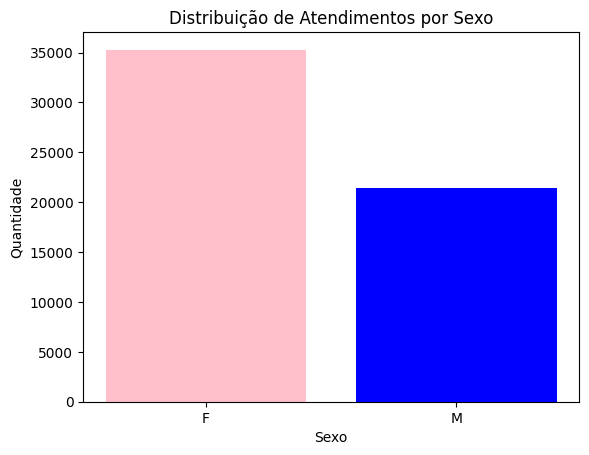

In [83]:
# Criar um gráfico de barras
plt.bar(distribuicao_sexo['Sexo'], distribuicao_sexo['Quantidade'], color=['pink', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distribuição de Atendimentos por Sexo')
plt.show()